In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import json
import math
import datetime
import matplotlib.pyplot as plt   # plotting
import seaborn as sns   # plotting heatmap
import yfinance as yf
%matplotlib inline
from yahoofinancials import YahooFinancials

from bs4 import BeautifulSoup

In [42]:
stock = yf.Ticker("1398.HK")
prices=stock.history(period="10y").Open

In [43]:
returns = prices.pct_change().fillna(0)
returns

Date
2014-08-07 00:00:00+08:00    0.000000
2014-08-08 00:00:00+08:00   -0.011516
2014-08-11 00:00:00+08:00    0.013592
2014-08-12 00:00:00+08:00    0.001916
2014-08-13 00:00:00+08:00    0.003824
                               ...   
2024-08-01 00:00:00+08:00   -0.011442
2024-08-02 00:00:00+08:00    0.000000
2024-08-05 00:00:00+08:00   -0.004630
2024-08-06 00:00:00+08:00   -0.011628
2024-08-07 00:00:00+08:00   -0.011765
Name: Open, Length: 2464, dtype: float64

In [44]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

adf_test(prices)

Results of Dickey-Fuller Test:
Test Statistic                   -2.242450
p-value                           0.191201
#Lags Used                       12.000000
Number of Observations Used    2451.000000
Critical Value (1%)              -3.433021
Critical Value (5%)              -2.862720
Critical Value (10%)             -2.567398
dtype: float64


In [45]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    
kpss_test(prices)


Results of KPSS Test:
Test Statistic            2.604659
p-value                   0.010000
Lags Used                30.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\charles\AppData\Local\Temp\ipykernel_11748\877764821.py:5: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




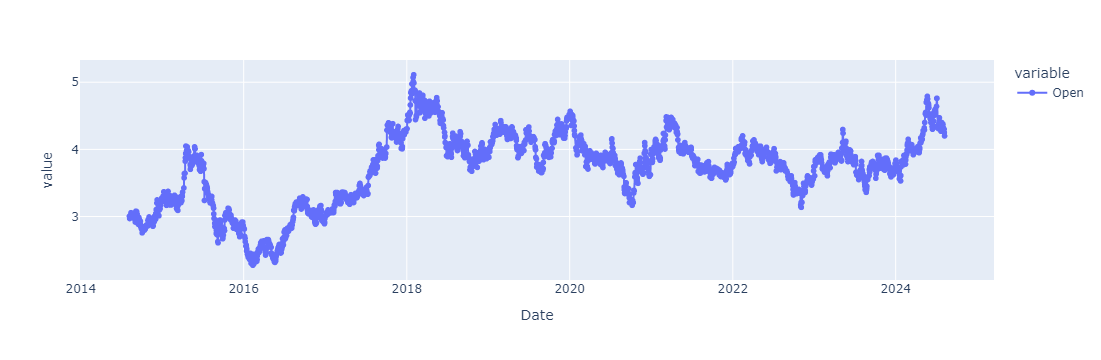

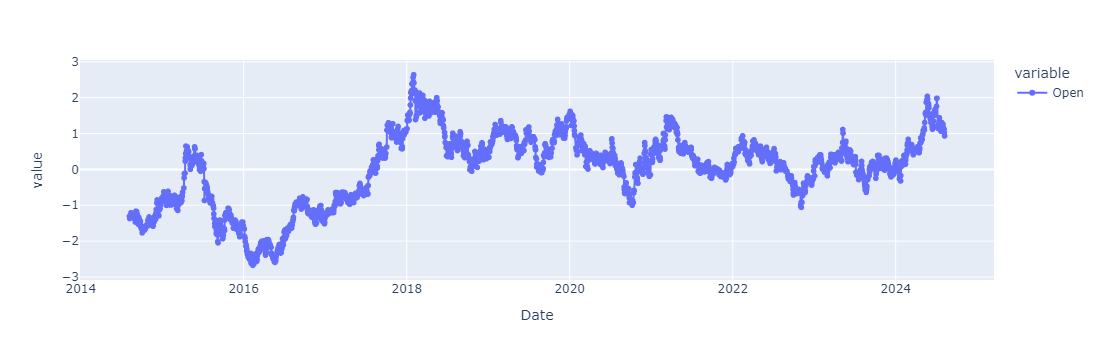

Date
2014-08-07 00:00:00+08:00    3.004910
2014-08-08 00:00:00+08:00    2.970304
2014-08-11 00:00:00+08:00    3.010677
2014-08-12 00:00:00+08:00    3.016445
2014-08-13 00:00:00+08:00    3.027980
                               ...   
2024-08-01 00:00:00+08:00    4.320000
2024-08-02 00:00:00+08:00    4.320000
2024-08-05 00:00:00+08:00    4.300000
2024-08-06 00:00:00+08:00    4.250000
2024-08-07 00:00:00+08:00    4.200000
Name: Open, Length: 2464, dtype: float64

In [46]:
import plotly.express as px
#df = px.data.gapminder().query("continent == 'Oceania'")
import plotly as py
import plotly.graph_objs as go
import plotly.offline as offline_py

offline_py.init_notebook_mode(connected=True)

factor = prices
spread_mean = np.mean(factor)
spread_std = np.std(factor)
z_score = (factor - spread_mean) / spread_std

start = "2022-05-05"
#end = "2024-05-05"

fig = px.scatter(prices) #["2022-03-09":]

fig.update_traces(mode='markers+lines')

fig.show()

returns = prices.pct_change().dropna()

fig =  px.scatter(z_score) #["2022-03-09":]

fig.update_traces(mode='markers+lines')

fig.show()
prices

In [35]:
z_score

Date
2014-08-07 00:00:00+08:00   -1.304532
2014-08-08 00:00:00+08:00   -1.369318
2014-08-11 00:00:00+08:00   -1.293734
2014-08-12 00:00:00+08:00   -1.282937
2014-08-13 00:00:00+08:00   -1.261341
                               ...   
2024-08-01 00:00:00+08:00    1.157485
2024-08-02 00:00:00+08:00    1.157485
2024-08-05 00:00:00+08:00    1.120043
2024-08-06 00:00:00+08:00    1.026436
2024-08-07 00:00:00+08:00    0.932829
Name: Open, Length: 2464, dtype: float64